# Explore of Boston 311 Non-emergency data 2015

## Table of content

    1. Introduction 
    2. Exploratory analysis
    2.1 Import and manipulate data
    2.2 Descriptive statistics
    3. Longitudinal analysis
    4. Ontime and Overdue analysis 
    4.1 caculate case solving durations 
    4.2 descriptive analysis of case solving durations
    4.2 caculate late case duration
    5. Neighborhood analysis
    6. Reporting source analysis
    7. Comparison of different cities
    8 . Conclusion

### 1. Introduction 
The 311 hotline provides an easy way for residents to connect with the City of Boston and request non-emergency city services and information. Boston 311 data is a latest, resourceful and open access dataset for municipal services of Boston. The data structure of 311 data are three levels. All 311 complaints cases are categorized into 14 subject category listed in Table 2. These subjects can be further broken down to 45 reasons and then sub-divided into 173 types.

    Table 2. 14 subject of 311 cases
    ●	Public Works Department
    ●	Transportation - Traffic Division
    ●	Animal Control
    ●	Property Management
    ●	Inspectional Services
    ●	Parks & Recreation Department
    ●	Civil Rights
    ●	Mayor's 24 Hour Hotline
    ●	Boston Police Department
    ●	Boston Water & Sewer Commission
    ●	Disability Department
    ●	Consumer Affairs & Licensing
    ●	Neighborhood Services
    ●	Youthline
    
This research aim to understand following research questions: 
  1. Based on 311 data, what are the meaningful indicators that reflect government performance?
  2. Doe the 311 reporting pattern could be explained by economic or demographic information?

Table 1 list six basic indicators that could be obtained from 311 data. If we tabulate any two factors from the six, it will form an new indicator of 311 data. So, theoretically the six indicators are able to form 15 different two factor tabulations, and 20 different three factor tabulations. It may not possible to explore all different indicators so this study categorize these indicators into different domains and conduct following analysis: longitudinal analysis, neighborhood analysis, reporting source analysis, ontime and overdue analysis. 
   
    Table 1. Key indicators of 311 cases
    Q Most frequently requested case ( # quantity of case)
    N Neighborhoods locations 
    C Category or type of cases
    T Time of reporting (Day, week, month, season, year) 
    R Response time of the city
    M Reporting methods: phone, app or city employee.
    
We use the full 311 dataset that from the year of 2011 to the end of 2017.

### 2. Exploratory analysis
#### 2.1 Import and manipulate data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time
plt.style.use('ggplot') # Look Pretty
import seaborn as sns

In [3]:
quanbu =pd.read_csv('/Users/haoyuzhao/Google Drive/311__all_to_2018-1-3.csv', encoding="ISO-8859-1", index_col='open_dt', parse_dates=True)
quanbu2=quanbu.drop(['CASE_ENQUIRY_ID', 'target_dt', 'closed_dt',
       'CASE_STATUS', 'CLOSURE_REASON', 'CASE_TITLE', 'QUEUE', 'Department', 'SubmittedPhoto', 'ClosedPhoto',
       'Location', 'Fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood_services_district',
       'ward', 'precinct', 'LOCATION_STREET_NAME', 'LOCATION_ZIPCODE',
       'Latitude', 'Longitude'],axis=1)
quanbu2=quanbu2.sort_index(ascending=True)
quanbu201=quanbu2.reset_index()
quanbu202=quanbu201.reset_index()

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2.2 Descriptive statistics

    

In [27]:
subject=quanbu.SUBJECT.value_counts()
reason=quanbu.REASON.value_counts()
type=quanbu.TYPE.value_counts()
neighborhood=quanbu.neighborhood.value_counts()
source=quanbu.Source.value_counts()
ontime=quanbu.OnTime_Status.value_counts()

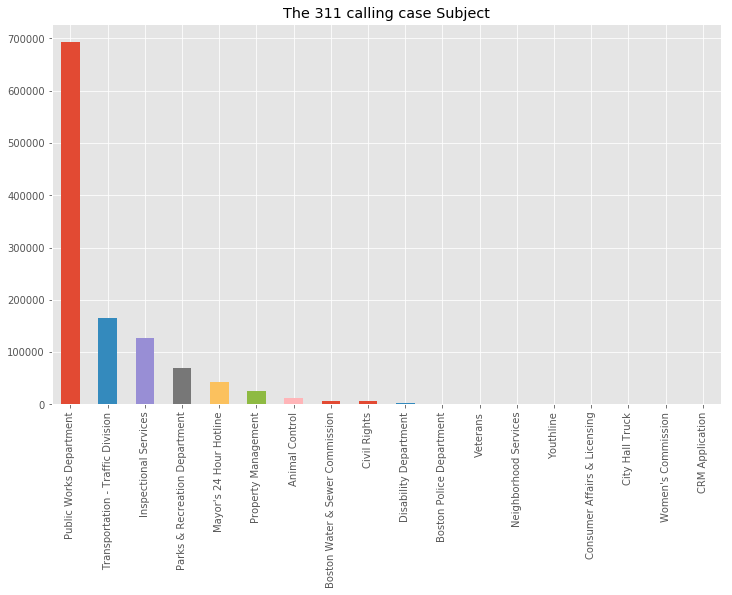

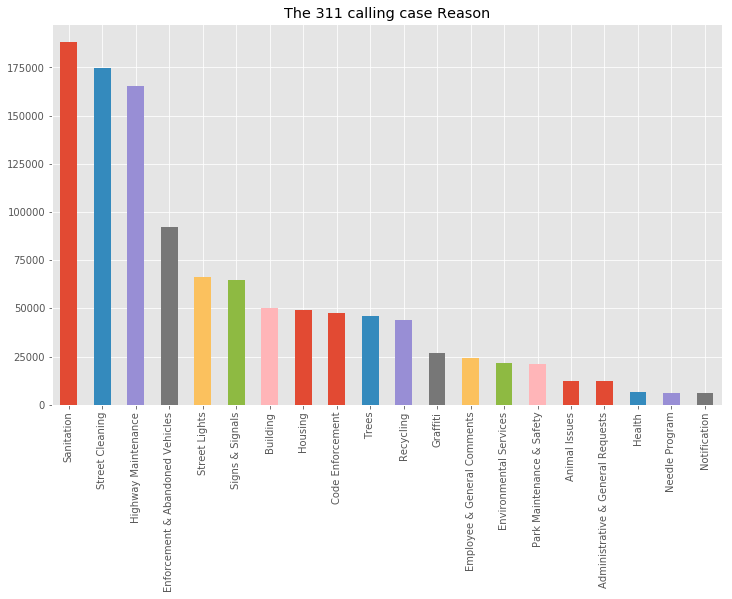

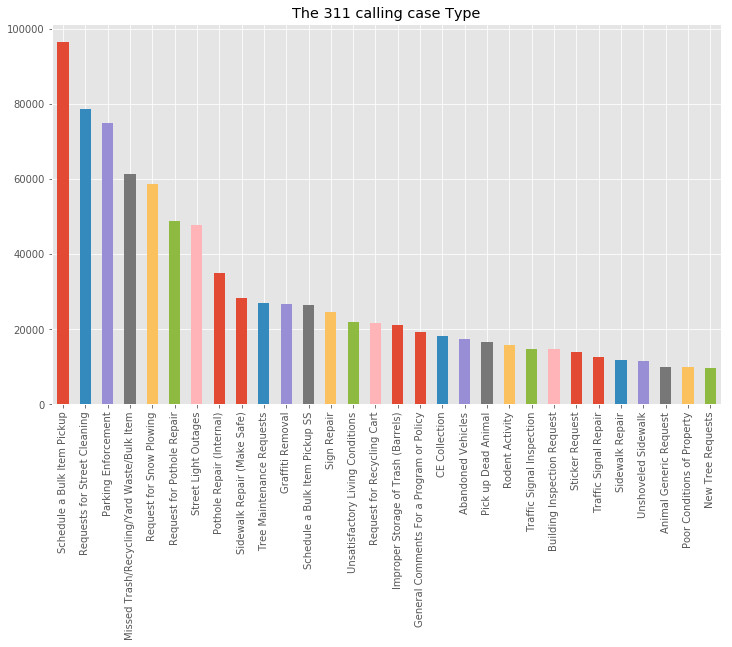

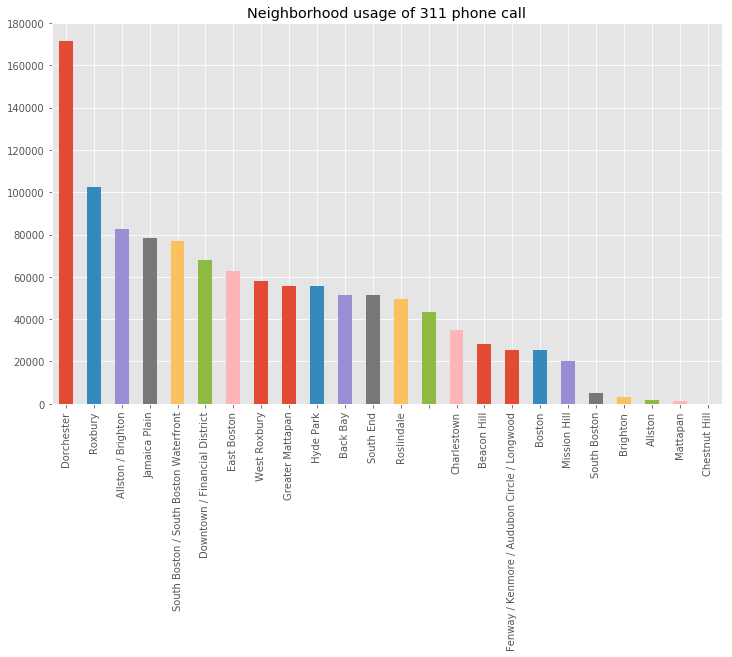

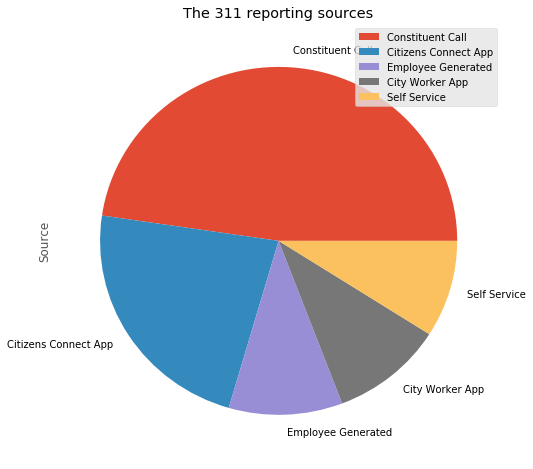

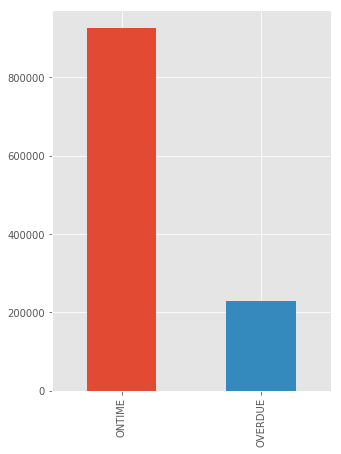

In [43]:
subject.plot(kind='bar',figsize=(12,7),title='The 311 calling case Subject')
plt.show()
reason[:20].plot(kind='bar',figsize=(12,7),title='The 311 calling case Reason')
plt.show()
type[:30].plot(kind='bar',figsize=(12,7),title='The 311 calling case Type')
plt.show()
neighborhood.plot(kind='bar',figsize=(12,7),title='Neighborhood usage of 311 phone call')
plt.show()
source[:5].plot(kind='pie',legend=True,figsize=(8,8),title='The 311 reporting sources')
plt.show()
ontime.plot(kind='bar',figsize=(5,7))
plt.show()

### 3. Longitudinal analysis
#### 3.1 data preparation
In order to make assessment of 311 data longitudinally, we create a set of variables based on reporting time (case open time) that identify the hour, weekday, week, month, quarter number of the 311 reporting.

In [98]:
#pandas datatime get hour, week, weekday, month, quarter, year number#
quanbu202['open_dt2']=pd.to_datetime(quanbu201['open_dt'])
quanbu202['hour']=quanbu202['open_dt2'].dt.hour
# convert hour number into category#
quanbu202['hour']=pd.cut(quanbu202['hour'], bins=[0,4,8, 12,17,21,24],
                         labels=['after midnight (0am-4am)','early morning(4-8am)', 
                                 'before noon (8am to 12pm)', 'after noon(12pm to 17 pm)',
                                 'evening(17pm to 21pm)','night(21-24)'])
quanbu202['year']=quanbu202['open_dt2'].dt.year
quanbu202['week']=pd.to_datetime(quanbu202['open_dt']).dt.week
quanbu202['weekday']=quanbu202['open_dt2'].dt.weekday
quanbu202['month']=quanbu202['open_dt2'].dt.month
quanbu202['quarter']=quanbu202['open_dt2'].dt.quarter
quanbu202['case']=1

In [24]:
# distinguish week, month and quarter number by year#
quanbu202['bar']='-'
quanbu202['week2']=quanbu202['week'].astype(str)+quanbu202['bar']+quanbu202['year'].astype(str)
quanbu202['month2']=quanbu202['month'].astype(str)+quanbu202['bar']+quanbu202['year'].astype(str)
quanbu202['quarter2']=quanbu202['quarter'].astype(str)+quanbu202['bar']+quanbu202['year'].astype(str)

In [103]:
quanbu202.head()

,level_0,index,open_dt,OnTime_Status,SUBJECT,REASON,TYPE,neighborhood,Source,open_dt2,...,year,week,weekday,month,quarter,bar,week2,month2,quarter2,case
0,0,0,2011-07-01 01:32:33,ONTIME,Public Works Department,Street Lights,Street Light Outages,Greater Mattapan,Employee Generated,2011-07-01 01:32:33,...,2011,26,4,7,3,-,26-2011,7-2011,3-2011,1
1,1,1,2011-07-01 02:18:31,ONTIME,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,Roslindale,Self Service,2011-07-01 02:18:31,...,2011,26,4,7,3,-,26-2011,7-2011,3-2011,1
2,2,2,2011-07-01 02:28:04,ONTIME,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,West Roxbury,Self Service,2011-07-01 02:28:04,...,2011,26,4,7,3,-,26-2011,7-2011,3-2011,1
3,3,3,2011-07-01 03:03:48,OVERDUE,Public Works Department,Street Lights,Street Light Outages,Hyde Park,Self Service,2011-07-01 03:03:48,...,2011,26,4,7,3,-,26-2011,7-2011,3-2011,1
4,4,4,2011-07-01 03:12:31,ONTIME,Public Works Department,Highway Maintenance,Highway Maintenance,Dorchester,Constituent Call,2011-07-01 03:12:31,...,2011,26,4,7,3,-,26-2011,7-2011,3-2011,1


#### 3.2 descriptive statistics

In [127]:
quanbu202=quanbu202.sort_values(by=['open_dt'],ascending=True)

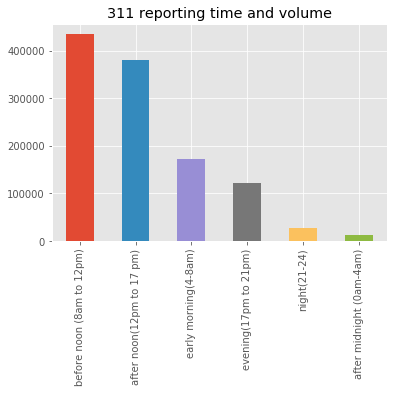

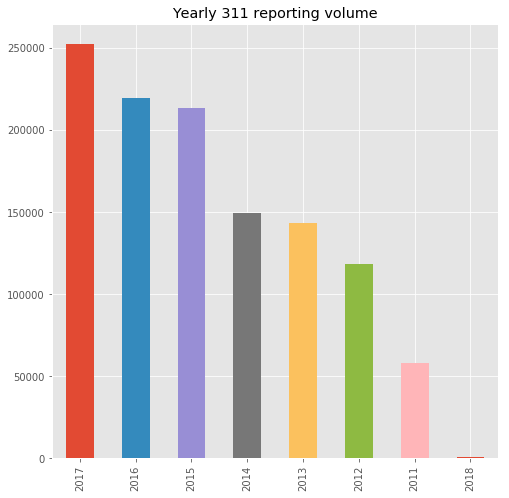

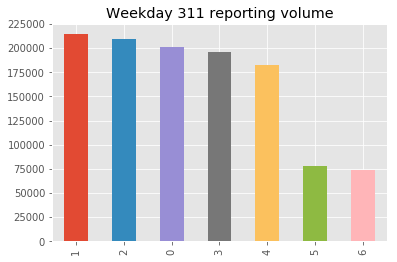

In [138]:
quanbu202['hour'].value_counts().plot(kind='bar', title='311 reporting time and volume')
plt.show()
quanbu202['year'].value_counts().plot(kind='bar', title='Yearly 311 reporting volume', figsize=(8,8))
plt.show()

quanbu202['weekday'].value_counts().plot(kind='bar', title='Weekday 311 reporting volume')
plt.show()


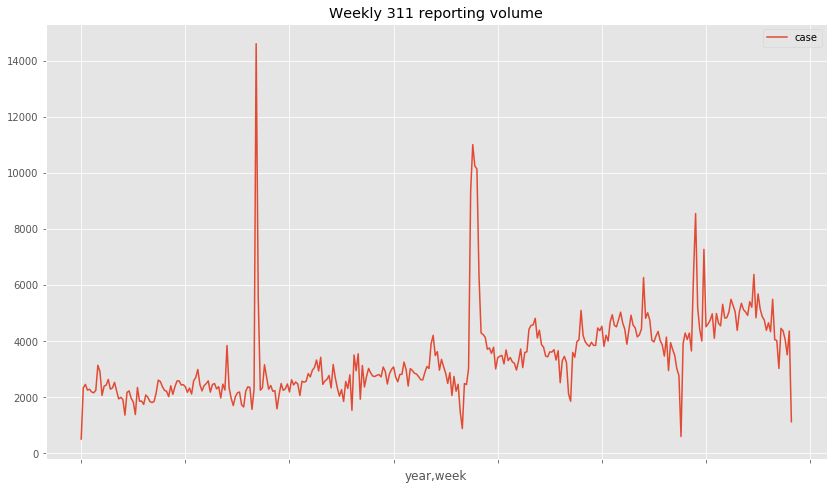

In [144]:
week= quanbu202.pivot_table(index=['year','week'],
                                  values='case',                                
                                  aggfunc='count')
week.plot(x=week.index,kind='line',title='Weekly 311 reporting volume', figsize=(14,8))
plt.show()

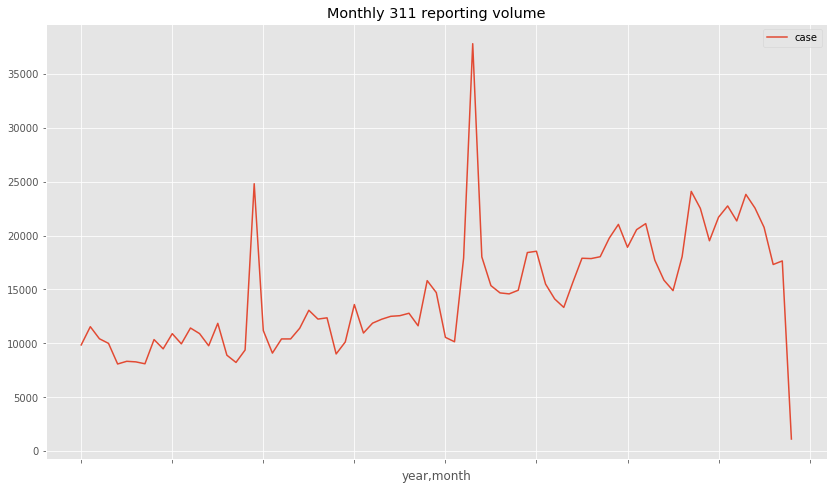

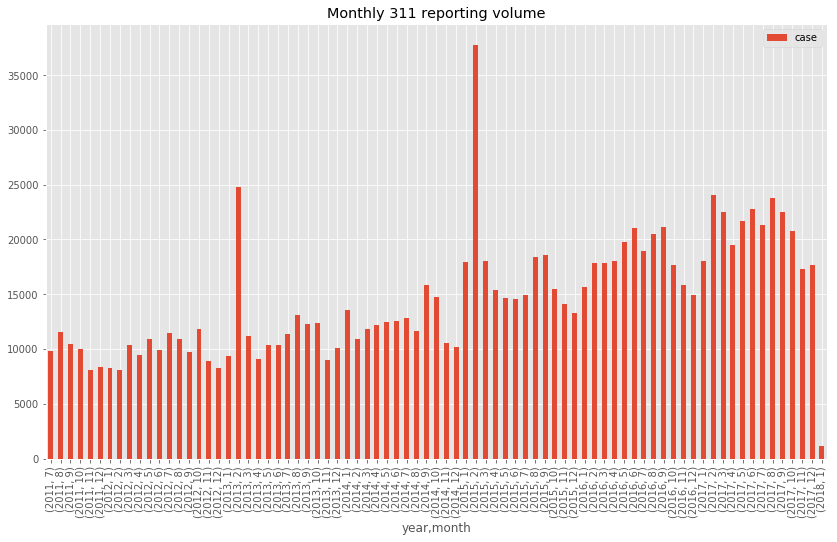

In [160]:
Month= quanbu202.pivot_table(index=['year','month'],
                                  values='case',                                
                                  aggfunc='count')
Month.plot(kind='line', title='Monthly 311 reporting volume', figsize=(14,8))
plt.show()
Month.plot(kind='bar', title='Monthly 311 reporting volume', figsize=(14,8))
plt.show()


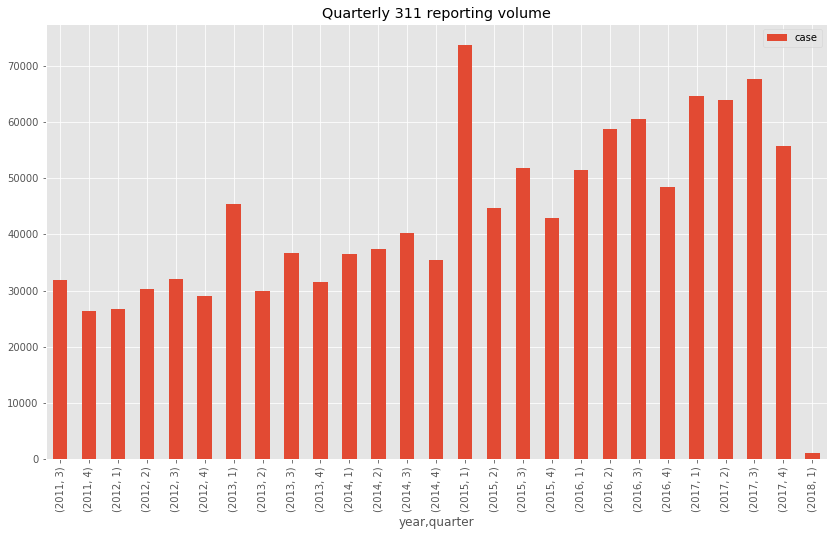

In [163]:
quarter= quanbu202.pivot_table(index=['year','quarter'],
                                  values='case',                                
                                  aggfunc='count')
quarter.plot(kind='bar', title='Quarterly 311 reporting volume', figsize=(14,8))
plt.show()
quarter2= quanbu202.pivot_table(index=['quarter','year'],
                                  values='case',                                
                                  aggfunc='count')


#### 3.3 Week based analysis

In [119]:
# create week pivot table #

yiwu_SUBJECT = quanbu202.pivot_table(index=['year','month'],
                                  values='case',
                                  columns='SUBJECT',
                                  aggfunc='count') 
yiwu_REASON = quanbu202.pivot_table(index=['year','month'],
                                  values='case',
                                  columns='REASON',
                                  aggfunc='count') 

yiwu_SUBJECT2 = quanbu202.pivot_table(index=['year','month'],
                                  values='case',
                                  columns=['REASON','TYPE'],
                                  aggfunc='count') 

yiwu_SOURCE = quanbu202.pivot_table(index=['year','month'],
                                  values='case',
                                  columns=['Source'],
                                  aggfunc='count')
                                 
yiwu_neighbor = quanbu202.pivot_table(index=['year','month'],
                                  values='case',
                                  columns=['neighborhood'],
                                  aggfunc='count')

#### 3.3 quarter statistics

#### 2.3 Calling SUBJECT 
The most frequent calling subject is from public work department.

In [ ]:
## 311 calling subject graph results 
subject_total=yiwu_SUBJECT.sum(axis=0).sort_values(ascending=False)
subject_total.reset_index().plot(kind='bar',x='SUBJECT',y=0,figsize=(12, 6))
plt.show()

The variation of public work department across the whole year is displayed. 
It peaks in winter time.

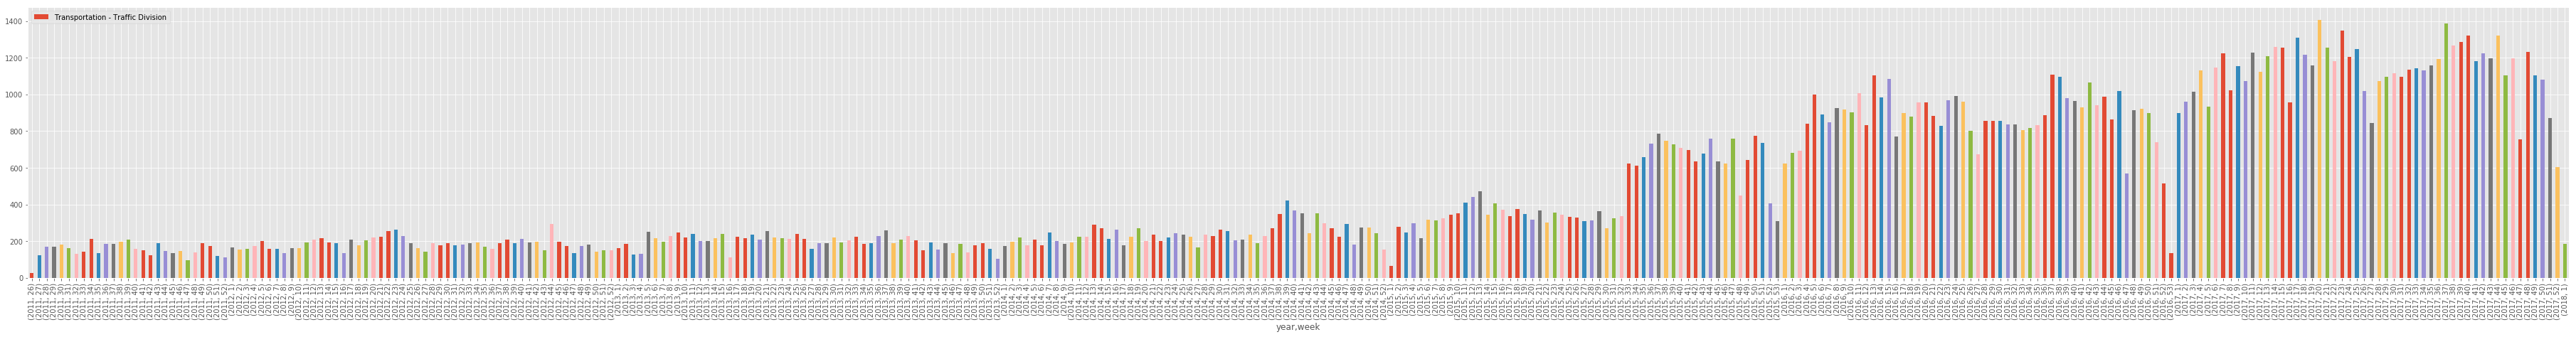

In [136]:
# select some column
pub_work=yiwu_SUBJECT.columns[-4]
Trans_Inspec=yiwu_SUBJECT.columns[[-3,-9]]
yiwu_SUBJECT.plot(x=yiwu_SUBJECT.index,y=pub_work, kind='bar',figsize=(64, 7))
plt.show()

Inspectional services requested are especially high in the winter.

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


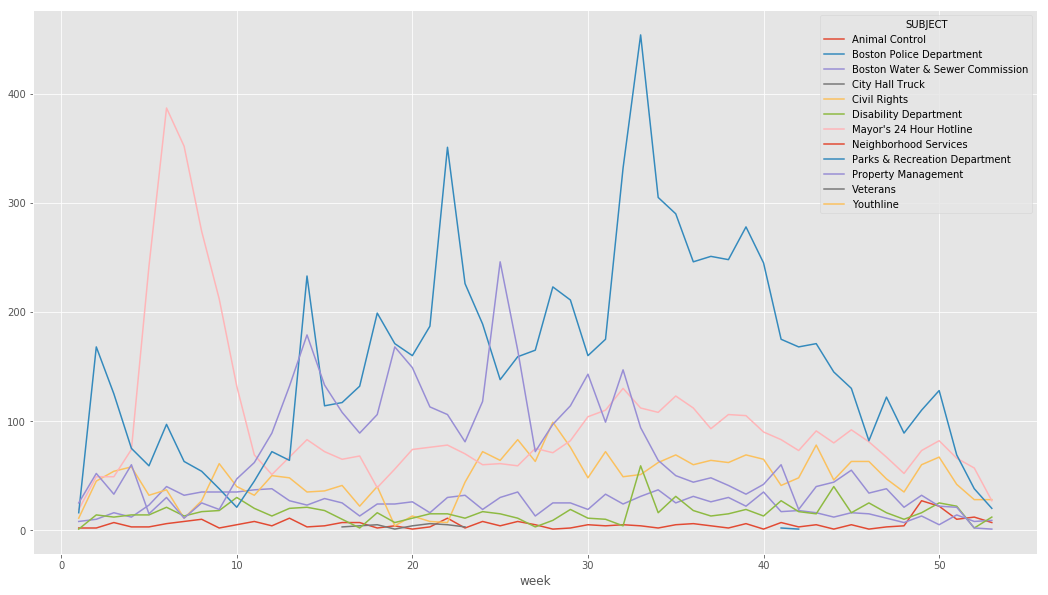

In [8]:
yiwu_SUBJECT.plot(x=yiwu_SUBJECT.index,y=['Animal Control', 'Boston Police Department',
       'Boston Water & Sewer Commission', 'City Hall Truck', 'Civil Rights',
       'Disability Department',
       "Mayor's 24 Hour Hotline", 'Neighborhood Services',
       'Parks & Recreation Department', 'Property Management',
               'Veterans', 'Youthline'], kind='line',figsize=(18, 10))
plt.show()

#### 2.4 Calling REASONS data

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


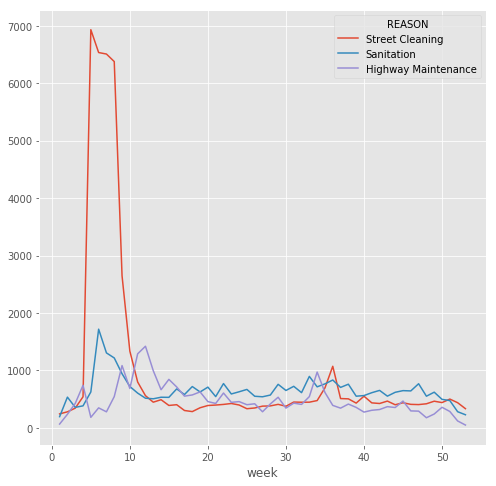

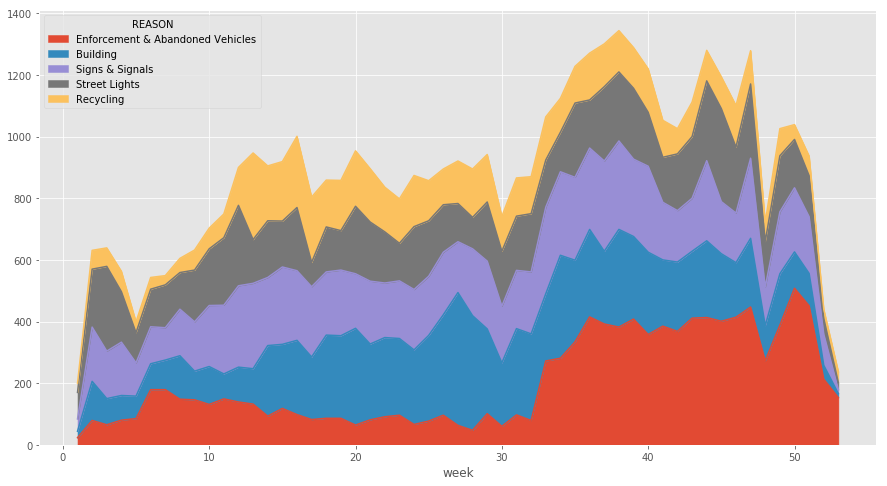

In [10]:
## 311 calling reason graph results  
reason_total=yiwu_REASON.sum(axis=0)
reason_total=reason_total.sort_values(ascending=False)
yiwu_REASON.plot(use_index=True,y=reason_total.index[:3], kind='line',figsize=(8, 8))
yiwu_REASON.plot(use_index=True,y=reason_total.index[3:8], kind='area',figsize=(15, 8))
plt.show()

Move one step closer to look at the calling case type. 185 different types. 
Most frequent requested call case type is also streat cleaning. This request largely increased in the winter time.

#### 2.5 Calling TYPE 

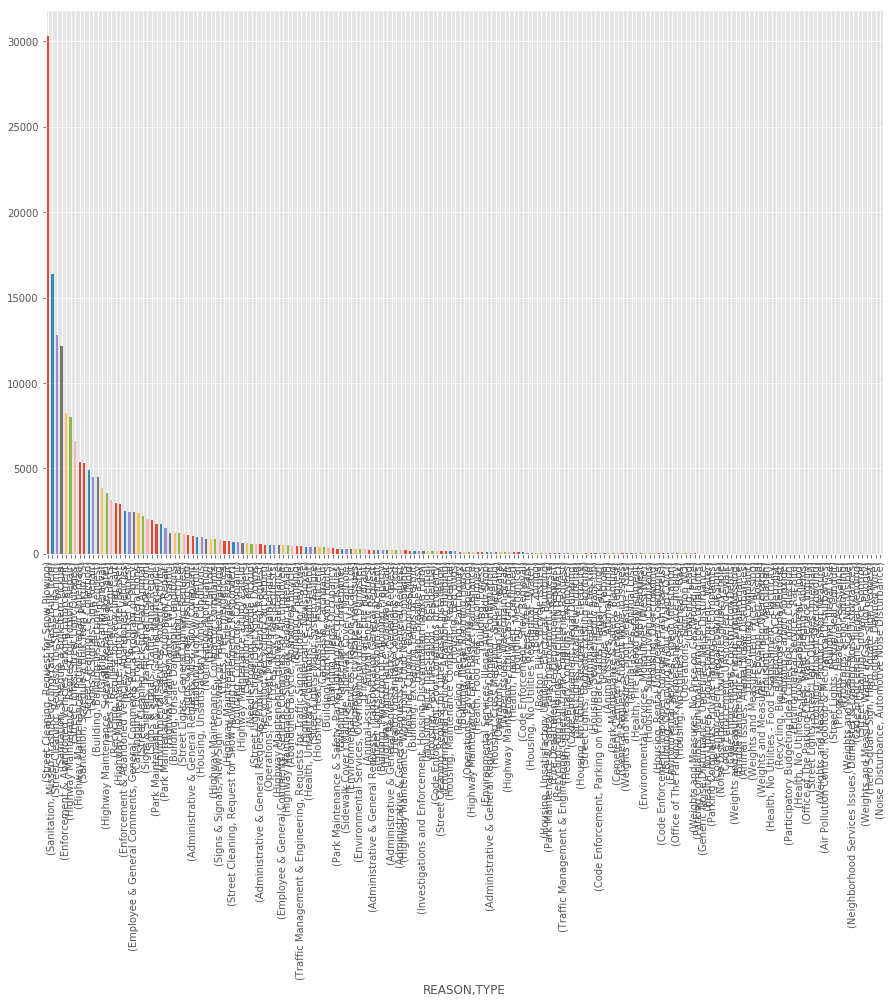

In [85]:
## 311 calling reason+type graph ## 185 types in total ##
Rea_type_total=yiwu_SUBJECT2.sum(axis=0)
Rea_type_total=Rea_type_total.sort_values(ascending=False)
Rea_type_total.plot(kind='bar',use_index=True,figsize=(15, 10))
plt.show()

The Missed Trash/Recycling/Yardd waste type in Sanitation directly refers to the sanitation truck pick up service. 
This figure demonstrate a significant winter growth of such services as similar to street cleaning cases. 

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


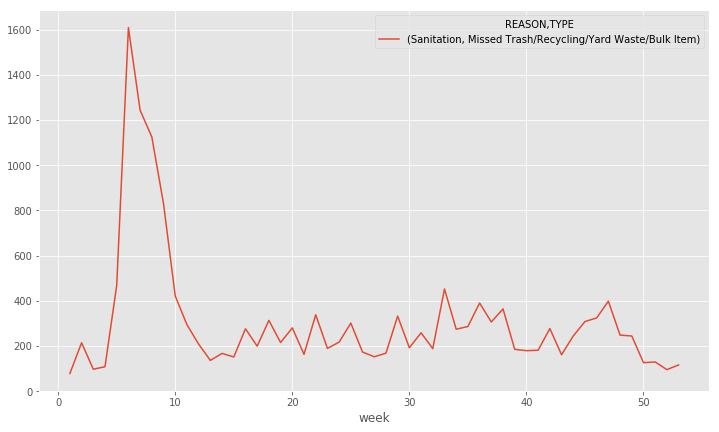

In [89]:
yiwu_SUBJECT2.plot(use_index=True,y=Rea_type_total.index[1:2], kind='line',figsize=(12, 7))
plt.show()

The parking enforcement is especially high after the 32 weeks of a year. 

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


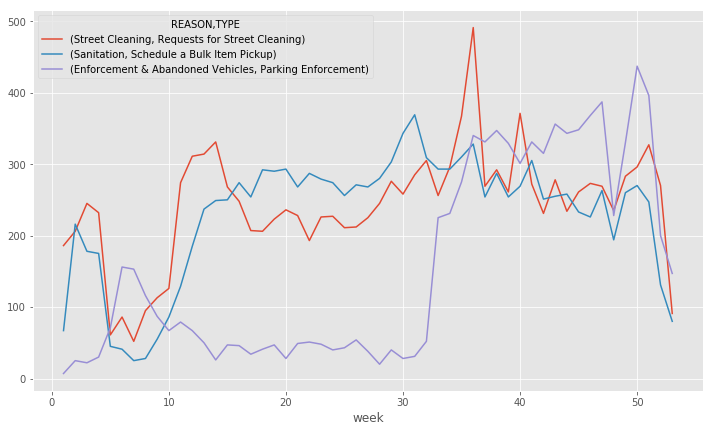

In [90]:
yiwu_SUBJECT2.plot(use_index=True,y=Rea_type_total.index[2:5], kind='line',figsize=(12, 7))
plt.show()

Similarly, the pothole repair cases seems icrease significantly during winter time. 

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


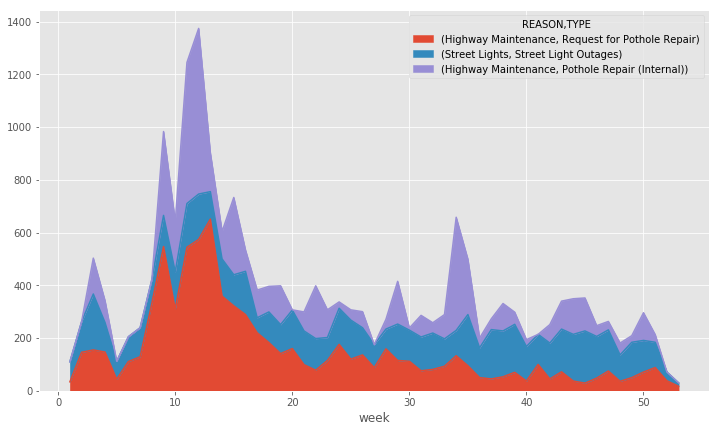

In [68]:
yiwu_SUBJECT2.plot(use_index=True,y=sub_rea_total.index[5:8], kind='area',figsize=(12, 7))
plt.show()

Dorchester request most 311 services. 
Most neighborhoods experience a service request increase between week 32 to 39 in 2015. 

#### 2.6 Calling Neighborhoods

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


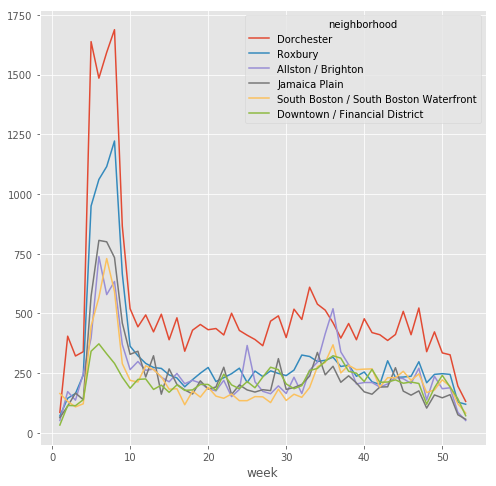

In [91]:
## 311 calling neighborhoods graph results  
neighbor_total=yiwu_neighbor.sum(axis=0)
neighbor_total=neighbor_total.sort_values(ascending=False)
# total number cases indicate that feb and march are most busy month
yiwu_neighbor.plot(use_index=True,y=neighbor_total.index[:6], kind='line',figsize=(8, 8))
plt.show()

The plots from calling sources demonstrate similar patterns as we show before:
Winter service request increase due to snow. 
Fall services request increase from week 32 to 39.

#### 2.7 Calling Sources

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


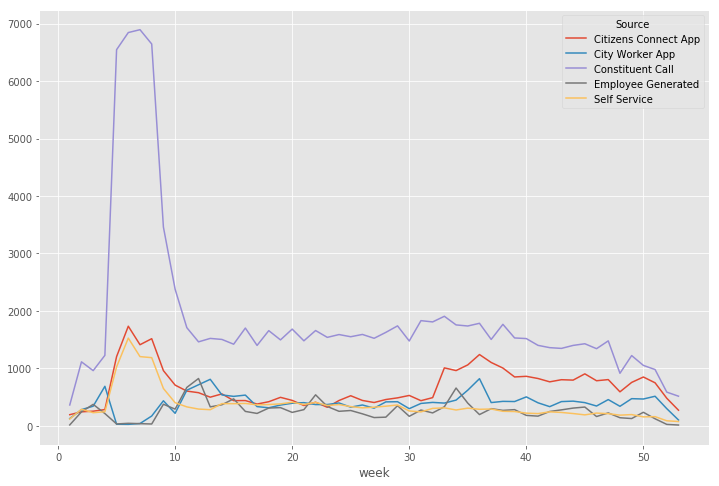

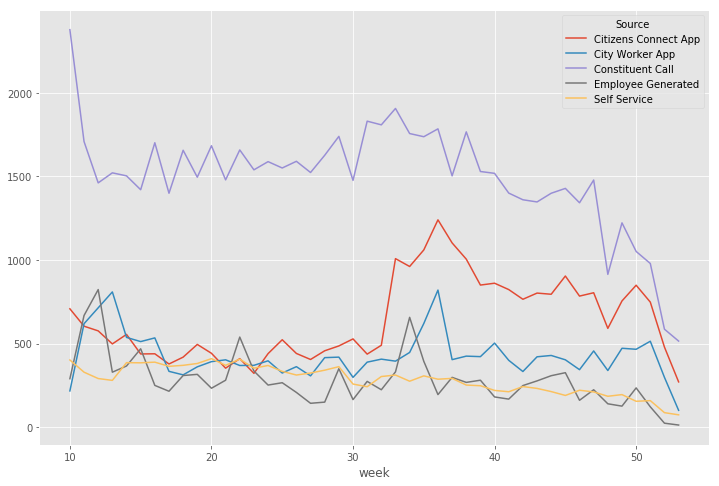

In [92]:
## 311 calling source graph results 
yiwu_SOURCE.plot(x=yiwu_SOURCE.index,y=['Citizens Connect App', 'City Worker App',
       'Constituent Call', 'Employee Generated','Self Service'], kind='line',figsize=(12, 8))
plt.show()
# plot exclude first 9 weeks
yiwu_SOURCE.iloc[9:].plot(x=yiwu_SOURCE.iloc[9:].index,y=['Citizens Connect App', 'City Worker App',
       'Constituent Call', 'Employee Generated','Self Service'], kind='line',figsize=(12, 8))
plt.show()

The pie plot demonstrate the total quantity proportions of sources.

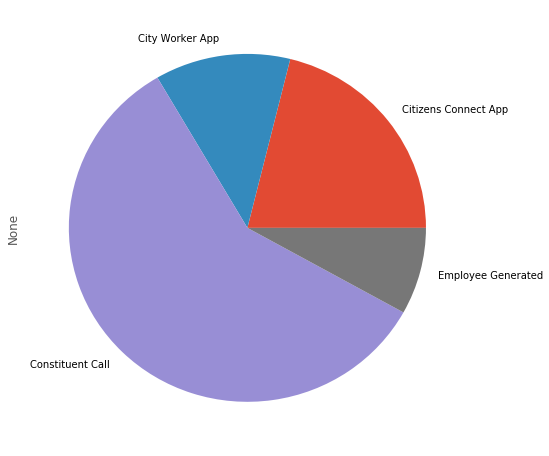

In [18]:
# pie plot
source_total=yiwu_SOURCE.sum(axis=0)
source_total[:4].plot.pie(figsize=(8, 8))
plt.show()

#### 2.8 Section conslution

### 3. Ontime and Overdue analysis
TARGET_DT demonstrate when does the city of Boston expect the case to close. 
#### 3.1 calculate 311 case solving duratrions---how long it takes to resolve a 311 case?

In [19]:
# import data # 
yiwu3=yiwu.drop(['CASE_ENQUIRY_ID','CLOSURE_REASON', 'CASE_TITLE', 'QUEUE', 'Department', 
       'SubmittedPhoto', 'ClosedPhoto','Location', 'fire_district',
       'pwd_district', 'city_council_district',
       'police_district','ward', 'precinct', 'land_usage', 'LOCATION_STREET_NAME',
       'Property_Type', 'Property_ID', 'Geocoded_Location'],axis=1)

yiwu3=yiwu3.sort_index(ascending=True)
yiwu301=yiwu3.reset_index()

In [23]:
## calculate duration and days 
yiwu301['OPEN_DT']=pd.to_datetime(yiwu301['OPEN_DT'])
yiwu301['CLOSED_DT']=pd.to_datetime(yiwu301['CLOSED_DT'])
yiwu301['Duration']=yiwu301['CLOSED_DT']-yiwu301['OPEN_DT']
yiwu301['SOLVE_DAY']=yiwu301['Duration'].dt.days


Most cases are solved within the same day. 
However some cases are remain unsolved for more than a hundred days.

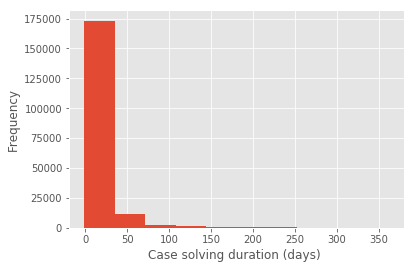

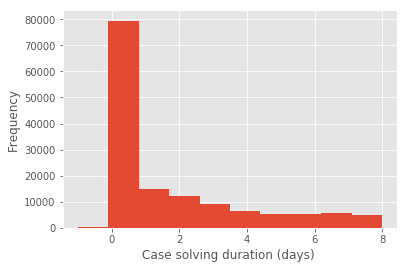

In [99]:
# plot histogram of case solve duration
yiwu301['SOLVE_DAY'].plot.hist()
plt.xlabel('Case solving duration (days) ')
plt.show()
yiwu301[yiwu301['SOLVE_DAY']<=8]['SOLVE_DAY'].plot.hist()
plt.xlabel('Case solving duration (days) ')
plt.show()

#### 3.2 late cases calculation
calculate late cases by mark out cases that have a close date later than its target date

In [34]:
yiwu302=yiwu301.drop(['CASE_STATUS','neighborhood_services_district'],axis=1) 

In [35]:
yiwu302=yiwu302.dropna()
yiwu302['CLOSED_DT']=pd.to_datetime(yiwu302['CLOSED_DT'])
yiwu302['TARGET_DT']=pd.to_datetime(yiwu302['TARGET_DT'])
yiwu302['LATE']=yiwu302['CLOSED_DT']>yiwu302['TARGET_DT']

We find that the results of generated case status 'LATE' is equal to 'OnTime_Status'. 

In [36]:
# check whether the generated "late" equals to 'Ontime_Status'
delay_case=yiwu302.groupby("LATE").agg([len]) # same thing
delay_case2=yiwu302.groupby("OnTime_Status").count() # self created LATE equals to ontime status

#### 3.3  Ontime  analysis.

In [37]:
### 311 ontime analysis: generate two relevent datasets ###
yiwu304_ontime=yiwu302[yiwu302['OnTime_Status']=='ONTIME'] 
yiwu304_overdue=yiwu302[yiwu302['OnTime_Status']=='OVERDUE'] 

In [44]:
ontime_case=yiwu304_ontime.groupby(['SUBJECT','REASON']).count()
ontime_case2=yiwu304_ontime.groupby(['SUBJECT','REASON','TYPE']).count()
ontime_case2=ontime_case2.reset_index()
ontime_case2=ontime_case2.sort_values(by='CLOSED_DT',ascending=False)
ontime_case2.head()

,SUBJECT,REASON,TYPE,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,neighborhood,LOCATION_ZIPCODE,LATITUDE,LONGITUDE,Source,Duration,SOLVE_DAY,LATE
105,Public Works Department,Sanitation,Missed Trash/Recycling/Yard Waste/Bulk Item,14546,14546,14546,14546,14546,14546,14546,14546,14546,14546,14546,14546
111,Public Works Department,Street Cleaning,Requests for Street Cleaning,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320
110,Public Works Department,Street Cleaning,Request for Snow Plowing,6420,6420,6420,6420,6420,6420,6420,6420,6420,6420,6420,6420
121,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723
107,Public Works Department,Street Cleaning,CE Collection,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978


Sanitation ranked top 1 in all categoreis of on-time cases 

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


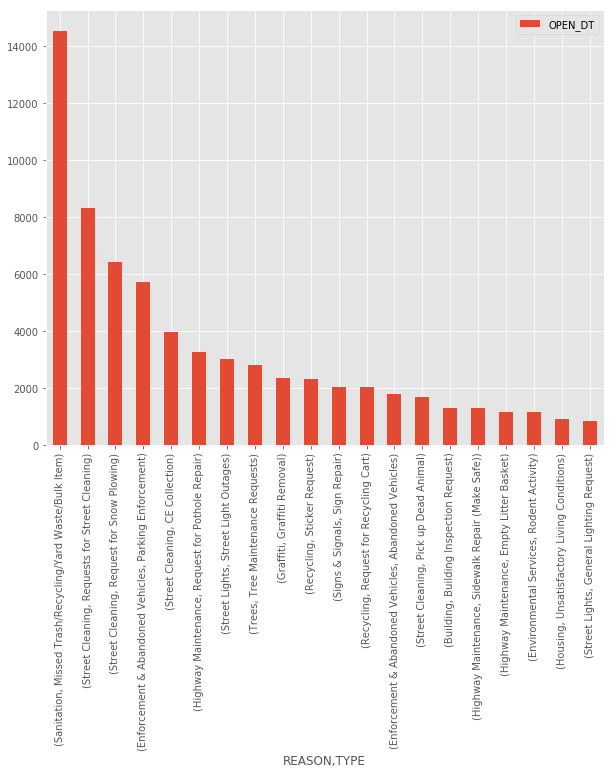

In [41]:
ontime_case2.iloc[:20,:].plot(x=['REASON','TYPE'],y=['OPEN_DT'],kind='bar',figsize=(10,8))
plt.show()

#### 3.4 Overdue cases
Building and highway maintanence are two reasons that have most overdue cases.

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


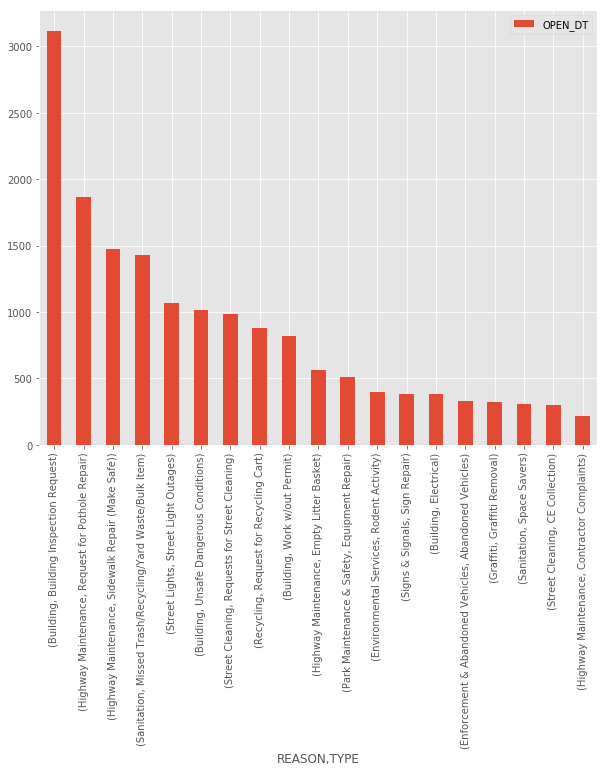

In [100]:
over_case=yiwu304_overdue.groupby(['SUBJECT','REASON']).count()
over_case2=yiwu304_overdue.groupby(['SUBJECT','REASON','TYPE']).count()
over_case2=over_case2.reset_index()
over_case2=over_case2.sort_values(by='CLOSED_DT',ascending=False)
over_case2.iloc[1:20,:].plot(x=['REASON','TYPE'],y=['OPEN_DT'],kind='bar',figsize=(10,8))
plt.show()

#### 3.4 Onetime and Overdue cases analysis


We select all cases that do not have a close date to understand why these cases do not have a close date.  

In [ ]:
## NA cases analysis ## --yiwu303--all na cases of target_dt
yiwu303=yiwu301[yiwu301['TARGET_DT'].isnull()] 

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('F-skQbBu56Y')